# CE444: Geotechnical Design
Completed by Brandon Auyeung to Dr. Arash Khosravifar. Due on 6th of Febuary, 2026

## Problems 1 through 3 are to be completed on the text document.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import great_tables as gt
from icecream import ic
import pandas as pd

## Problem 4

PI = 40

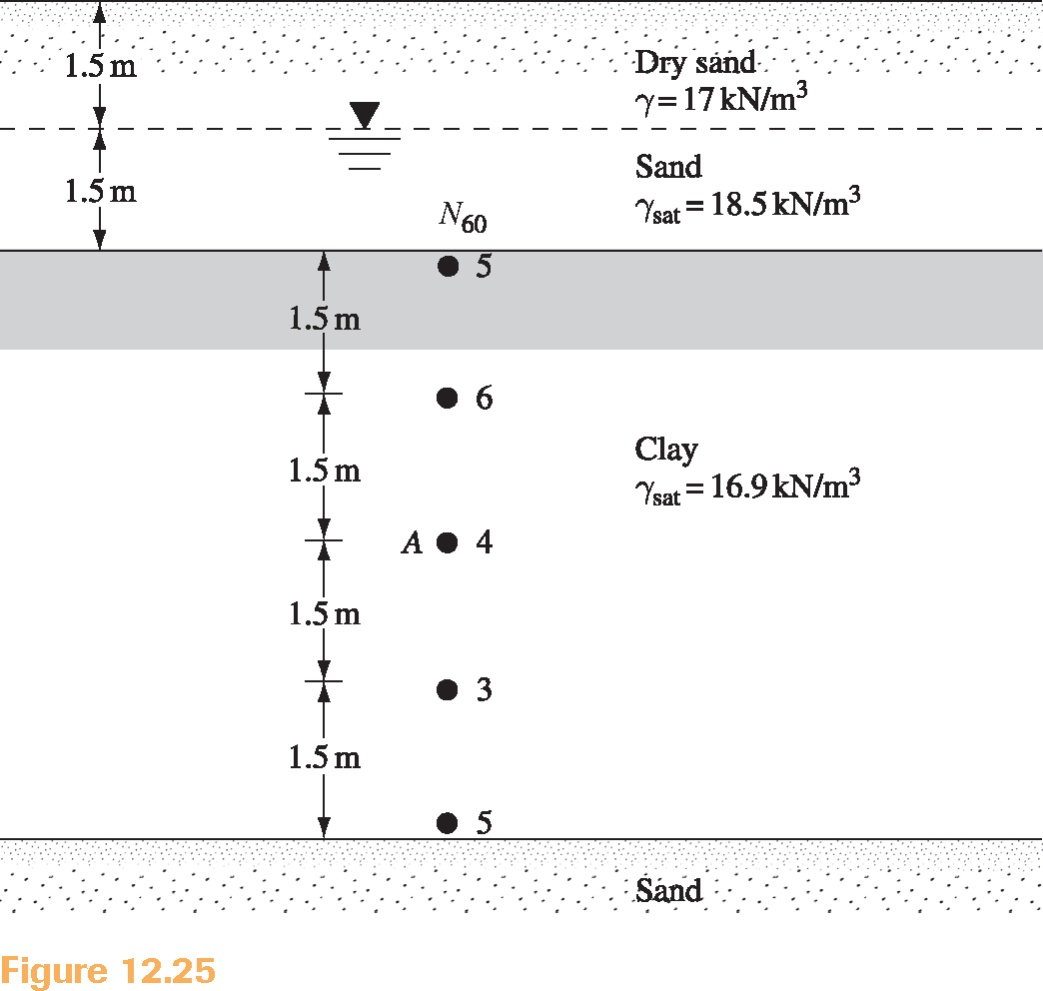

[18.45 22.14 14.76 11.07 18.45]


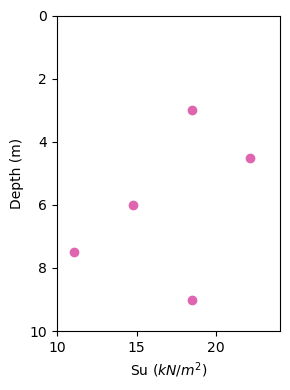

Mean and Standard Deviation of Su
16.974 3.763076401031475
minus 1 sigma , plus 1 sigma
13.210923598968526 20.737076401031477


In [2]:
# collect N60 values
N60_z3 = 5
N60_z3b6 = 6
N60_z6 = 4
N60_z6b9 = 3
N60_z9 = 5

# collect f1 graph ~ 0.045
f1 = 0.045
Pa = 100 # 1 atm = 100 kPa

Su = np.zeros(5)

Su[0] = 0.82*Pa*f1*N60_z3
Su[1] = 0.82*Pa*f1*N60_z3b6
Su[2] = 0.82*Pa*f1*N60_z6
Su[3] = 0.82*Pa*f1*N60_z6b9
Su[4] = 0.82*Pa*f1*N60_z9

depth_forSu = np.array([3, 4.5, 6, 7.5, 9])
print(Su)


# plot Su w.r.t. depth
fig, ax = plt.subplots(figsize=(3,4), tight_layout=True)
plt.plot(Su, depth_forSu, color = "#df65b0", label="Su", marker='o', linestyle='None')
plt.ylabel("Depth (m)")
plt.xlabel("Su ($kN/m^2$)")

ax.set_ylim(0, 10)
ax.yaxis.set_inverted(True)
ax.set_xlim(10, 24)
# plt.grid(True)
# plt.legend(frameon=False, loc='best', fontsize=8)
plt.show()

Su_mu = np.mean(Su)
Su_std = np.std(Su)
print("Mean and Standard Deviation of Su")
print(Su_mu, Su_std)
print("minus 1 sigma , plus 1 sigma")
print(Su_mu-Su_std, Su_mu+Su_std)



## Problem 5

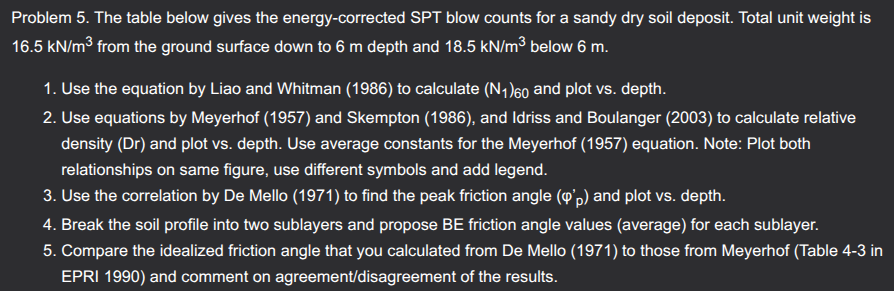

In [3]:
p5data_depth = np.array([3,4.5,6,7.5,9,10.5,12]) # m
p5data_gamma = np.array([16.5,16.5,16.5,18.5,18.5,18.5,18.5]) # kN/m^3
p5data_N60 = np.array([7,9,11,16,18,20,22]) # energy corrected SPT blow count

Liao and Whitman (1968): $$(N_1)_{60} = N_{1} \sqrt{\frac{P_a}{\sigma_v'}}$$

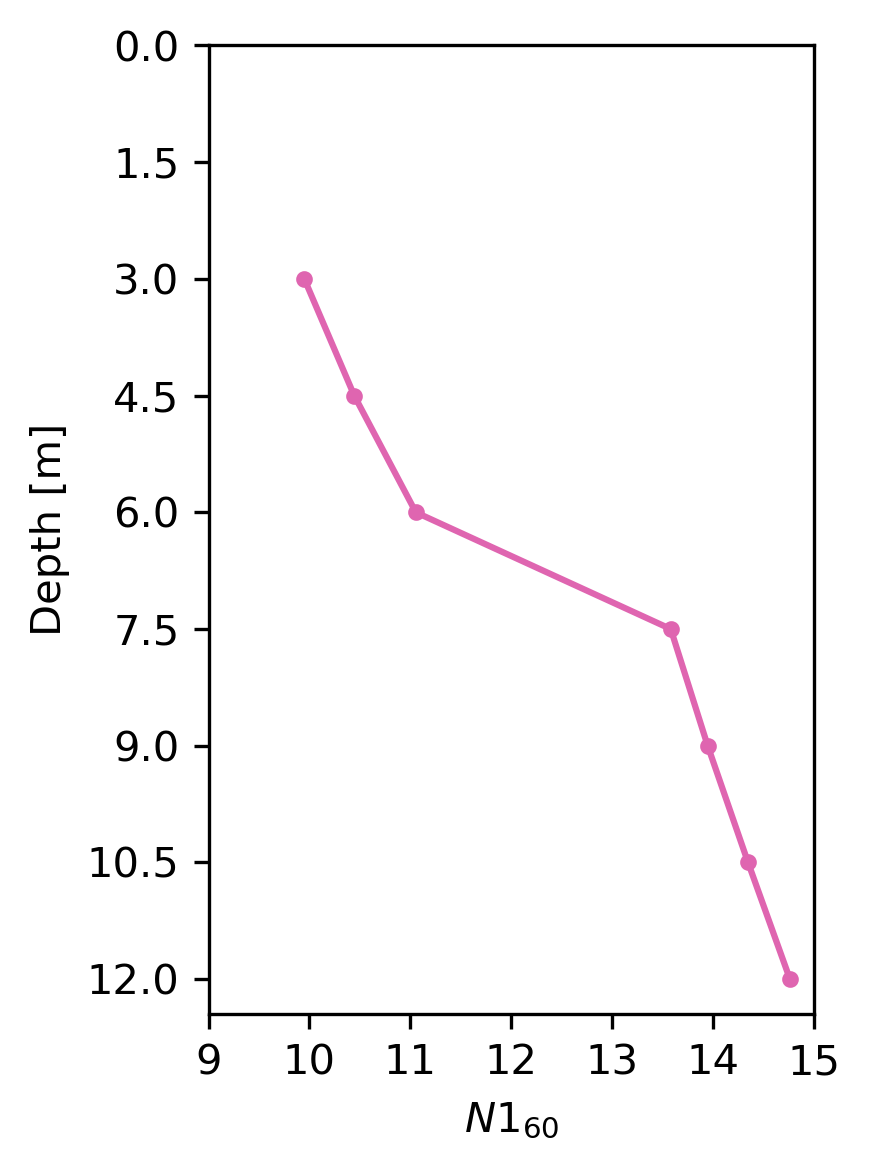

In [4]:
veffStress = np.zeros(len(p5data_depth))
N1_60 = np.zeros(len(p5data_depth))

for i in range(len(p5data_depth)):
    veffStress[i] = p5data_gamma[i]*p5data_depth[i]
    N1_60[i] = p5data_N60[i]*np.sqrt(Pa/veffStress[i])

fig, ax = plt.subplots(figsize=(3,4), tight_layout=True, dpi=300)

plt.plot(N1_60, p5data_depth, color = "#df65b0", marker='.', linestyle='-')
plt.ylabel("Depth [m]")
plt.xlabel("${N1}_{60}$")

ax.set_yticks([0, 1.5, 3, 4.5, 6, 7.5, 9, 10.5, 12])
ax.yaxis.set_inverted(True)
ax.set_xticks(np.arange(9,16,1))
# plt.grid(True)
# plt.legend(frameon=False, loc='best', fontsize=8)
plt.show()


Meyerhof (1957) and Skempton (1986) 
$$D_R = \sqrt{\frac{N_{60}}{A + BC \frac{\sigma_v'}{P_a}}}$$

Note: $$A = 36.5$$ $$B = 27 $$ $$C = 1$$

I&B (2003)
$$ D_R = \sqrt{\frac{{N1}_{60}}{46}} $$

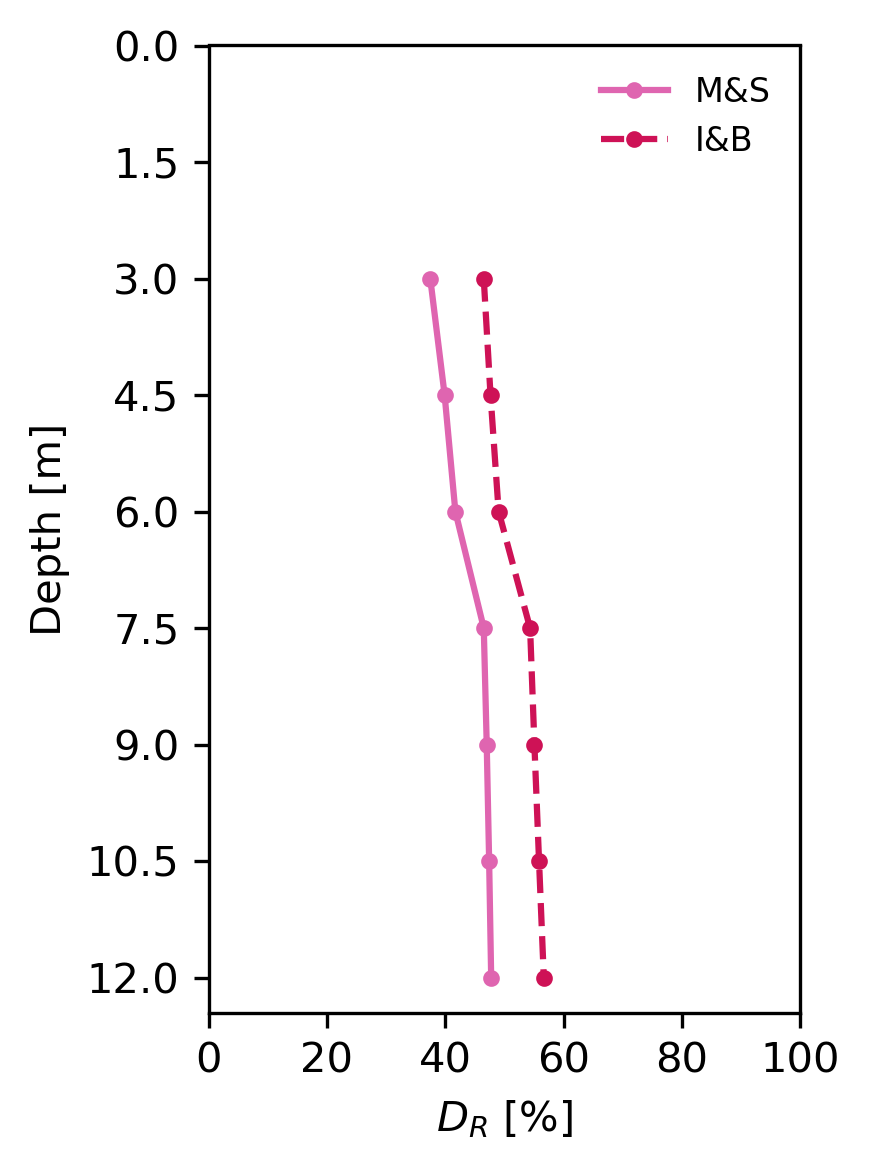

In [5]:
# meyerhof and skempton empirical constants
a_ms = 36.5
b_ms = 27
c_ms = 1

# meyerhoff and skempton vs i&b
DR_ms = np.zeros(len(p5data_depth))
DR_ib = np.zeros(len(p5data_depth))

for i in range(len(p5data_depth)):
    DR_ms[i] = np.sqrt(p5data_N60[i]/(a_ms + (b_ms*c_ms*(veffStress[i]/Pa))))
    DR_ib[i] = np.sqrt(N1_60[i]/46)

fig, ax = plt.subplots(figsize=(3,4), tight_layout=True, dpi=300)

plt.plot(100*DR_ms, p5data_depth, color = "#df65b0", marker='.', linestyle='-', label = 'M&S')
plt.plot(100*DR_ib, p5data_depth, color = "#ce1256", marker='.', linestyle='--', label = 'I&B')
plt.ylabel("Depth [m]")
plt.xlabel("$D_R$ [%]")

ax.set_yticks([0, 1.5, 3, 4.5, 6, 7.5, 9, 10.5, 12])
ax.yaxis.set_inverted(True)
ax.set_xticks(np.arange(0,101,20))
plt.legend(frameon=False, loc='best', fontsize=8)
plt.show()

De Mello, 1971:

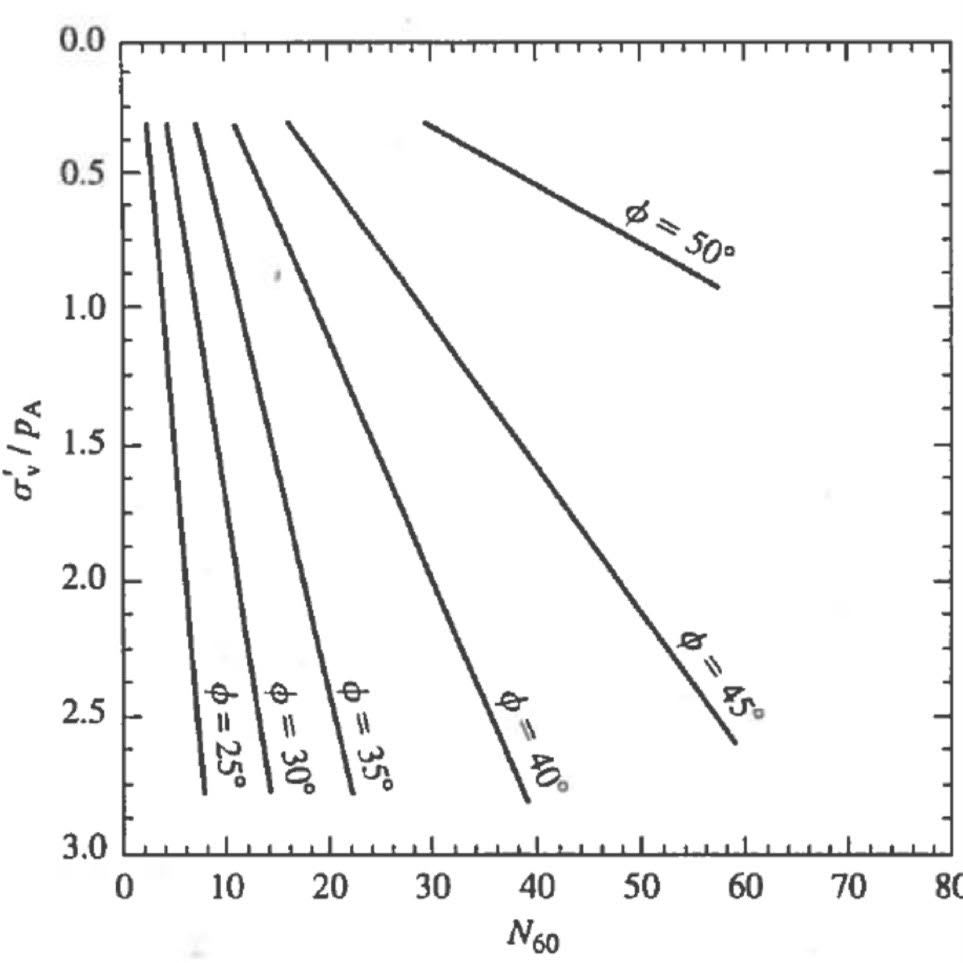

<>:11: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
<>:11: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
/tmp/ipykernel_44838/1648534901.py:11: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
  ax.set_ylabel("$\\frac{\sigma_v'}{P_a}$")


Text(0, 0.5, "$\\frac{\\sigma_v'}{P_a}$")

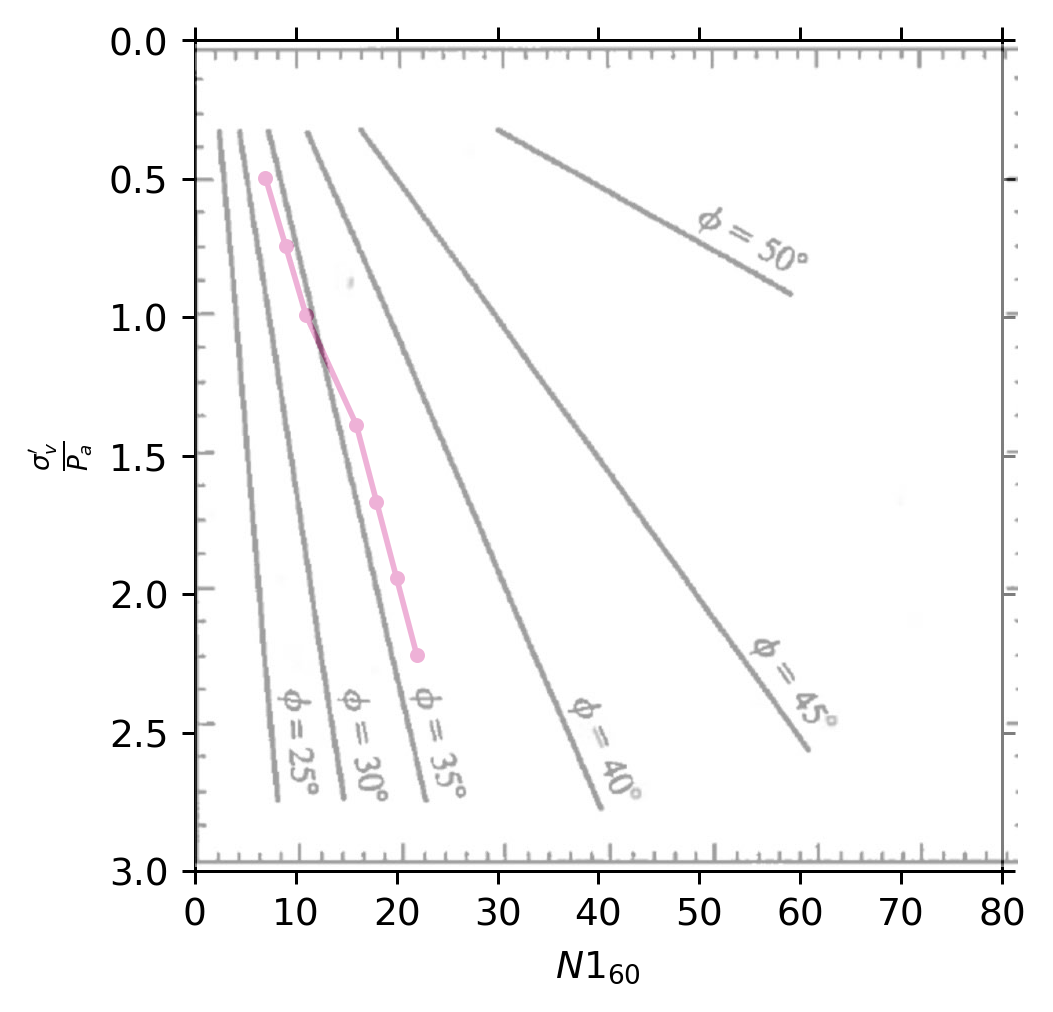

In [6]:
veffStress_Pa = veffStress/Pa
deMello_graph = plt.imread("deMello.jpg")
fig, ax = plt.subplots(figsize=(4,3.85), tight_layout=True, dpi=270)
plt.plot(p5data_N60, veffStress_Pa, color = "#df65b0", marker='.', zorder = 1)
ax.set_xticks(np.arange(0,81,10))
ax.set_yticks(np.arange(0,3.1,0.5))
ax.yaxis.set_inverted(True)
ax.tick_params(axis='both', which='both', direction='out', bottom=True, top=True, left=True, right=True)
fig.figimage(deMello_graph,195, 145, zorder = 0, alpha = 0.5)
ax.set_xlabel("${N1}_{60}$")
ax.set_ylabel("$\\frac{\sigma_v'}{P_a}$")


In [7]:
phi_sublayer1 = np.average([32,34,34.5])
print(phi_sublayer1)
phi_sublayer2 = 36
print(phi_sublayer2)

33.5
36


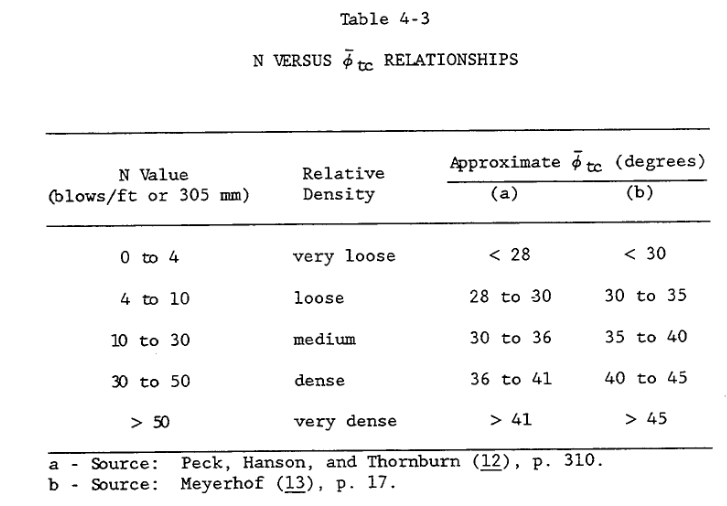

$D_R$ in range 40% to 60% are correctly represented by $\phi '$. Blow counts higher than expected by EPRI, 1990.

## Problem 6

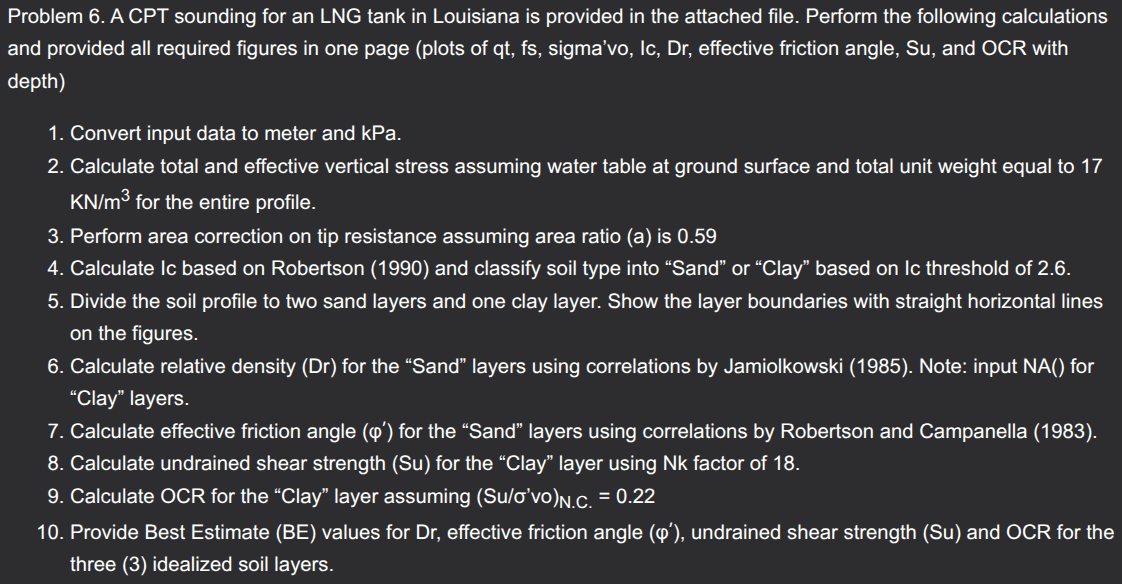

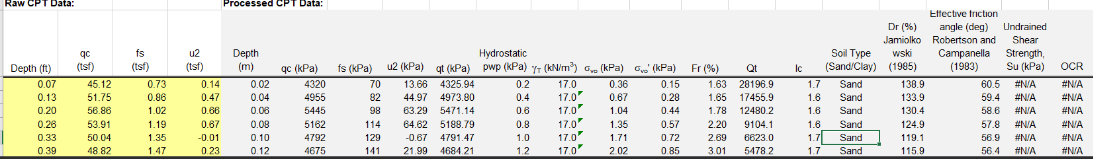

In [8]:
p6data = pd.read_excel('ce444w26hw3-given/CE444_W26_HW3.xlsx', sheet_name = 'Pr6', skiprows=2, header=None)
p6data = p6data.drop(p6data.columns[4:33], axis=1)
p6data.columns = ["z [ft]", "qc [tsf]", "fs [tsf]", "u2 [tsf]"]
p6data

,z [ft],qc [tsf],fs [tsf],u2 [tsf]
0,0.07,45.11634,0.7347,0.1426
1,0.13,51.74772,0.8573,0.4696
2,0.20,56.86290,1.0183,0.6609
3,0.26,53.90868,1.1937,0.6748
4,0.33,50.03910,1.3453,-0.0070
...,...,...,...,...
1246,81.80,210.01770,1.3542,0.2992
1247,81.87,210.99285,1.3204,0.2296
1248,81.93,215.15370,1.1792,0.2156
1249,82.00,220.68630,1.0380,0.1879


1 tsf = 95.76 kPa

In [9]:
# convert to SI from Imperial
p6data['z [m]'] = p6data['z [ft]'] / 3.281 #  3.281 ft = 1 m
p6data['qc [kPa]'] = p6data['qc [tsf]'] * 95.76  # 1 tsf = 95.76 kPa
p6data['fs [kPa]'] = p6data['fs [tsf]'] * 95.76  # 1 tsf = 95.76 kPa
p6data['u2 [kPa]'] = p6data['u2 [tsf]'] * 95.76  # 1 tsf = 95.76 kPa
p6data

,z [ft],qc [tsf],fs [tsf],u2 [tsf],z [m],qc [kPa],fs [kPa],u2 [kPa]
0,0.07,45.11634,0.7347,0.1426,0.021335,4320.340718,70.354872,13.655376
1,0.13,51.74772,0.8573,0.4696,0.039622,4955.361667,82.095048,44.968896
2,0.20,56.86290,1.0183,0.6609,0.060957,5445.191304,97.512408,63.287784
3,0.26,53.90868,1.1937,0.6748,0.079244,5162.295197,114.308712,64.618848
4,0.33,50.03910,1.3453,-0.0070,0.100579,4791.744216,128.825928,-0.670320
...,...,...,...,...,...,...,...,...
1246,81.80,210.01770,1.3542,0.2992,24.931423,20111.294952,129.678192,28.651392
1247,81.87,210.99285,1.3204,0.2296,24.952758,20204.675316,126.441504,21.986496
1248,81.93,215.15370,1.1792,0.2156,24.971045,20603.118312,112.920192,20.645856
1249,82.00,220.68630,1.0380,0.1879,24.992380,21132.920088,99.398880,17.993304


In [10]:
# assumptions 
gamma = 17 # kN/m^3
gamma_w = 9.81 # kN/m^3
# gwt at surf.
# tip resistance area ratio = 0.59
area_ratio = 0.59

p6data['pwp [kPa]'] = p6data['z [m]']*gamma_w
p6data['tvStress [kPa]'] = p6data['z [m]']*gamma
p6data['veStress [kPa]'] = p6data['tvStress [kPa]'] -  p6data['pwp [kPa]']
p6data

,z [ft],qc [tsf],fs [tsf],u2 [tsf],z [m],qc [kPa],fs [kPa],u2 [kPa],pwp [kPa],tvStress [kPa],veStress [kPa]
0,0.07,45.11634,0.7347,0.1426,0.021335,4320.340718,70.354872,13.655376,0.209296,0.362694,0.153398
1,0.13,51.74772,0.8573,0.4696,0.039622,4955.361667,82.095048,44.968896,0.388692,0.673575,0.284883
2,0.20,56.86290,1.0183,0.6609,0.060957,5445.191304,97.512408,63.287784,0.597988,1.036269,0.438281
3,0.26,53.90868,1.1937,0.6748,0.079244,5162.295197,114.308712,64.618848,0.777385,1.347150,0.569765
4,0.33,50.03910,1.3453,-0.0070,0.100579,4791.744216,128.825928,-0.670320,0.986681,1.709845,0.723164
...,...,...,...,...,...,...,...,...,...,...,...
1246,81.80,210.01770,1.3542,0.2992,24.931423,20111.294952,129.678192,28.651392,244.577263,423.834197,179.256934
1247,81.87,210.99285,1.3204,0.2296,24.952758,20204.675316,126.441504,21.986496,244.786559,424.196891,179.410332
1248,81.93,215.15370,1.1792,0.2156,24.971045,20603.118312,112.920192,20.645856,244.965956,424.507772,179.541817
1249,82.00,220.68630,1.0380,0.1879,24.992380,21132.920088,99.398880,17.993304,245.175251,424.870466,179.695215


In [25]:
# calculate I_c

p6data['qt [kPa]'] = p6data['qc [kPa]'] + (1-area_ratio)**p6data['u2 [kPa]'] 
# note: qt calc is practically negligible since differnce between qt and qc is minimal. 
# calc is being done for completeness, rather than necesity
p6data['Qt'] = (p6data['qt [kPa]'] - p6data['tvStress [kPa]'])/p6data['veStress [kPa]']
p6data['Fr [%]'] = (100) * (p6data['fs [kPa]']/(p6data['qt [kPa]'] - p6data['tvStress [kPa]']))

p6data['Ic'] = ((3.47 - np.log10(p6data['Qt']))**2 + (np.log10(p6data['Fr [%]']) + 1.22)**2)**0.5

p6data['Soil Behavior'] = np.zeros(len(p6data['Ic']))

for i, rad in enumerate(p6data['Ic']):
    if rad < 2.6:
        p6data.loc[i, 'Soil Behavior'] = 0 # sand
    else:
        p6data.loc[i, 'Soil Behavior'] = 1 # clay

p6data

,z [ft],qc [tsf],fs [tsf],u2 [tsf],z [m],qc [kPa],fs [kPa],u2 [kPa],pwp [kPa],tvStress [kPa],veStress [kPa],qt [kPa],Qt,Fr [%],Ic,Soil Behavior
0,0.07,45.11634,0.7347,0.1426,0.021335,4320.340718,70.354872,13.655376,0.209296,0.362694,0.153398,4320.340724,28161.827765,1.628593,1.734884,0.0
1,0.13,51.74772,0.8573,0.4696,0.039622,4955.361667,82.095048,44.968896,0.388692,0.673575,0.284883,4955.361667,17392.031272,1.656917,1.632491,0.0
2,0.20,56.86290,1.0183,0.6609,0.060957,5445.191304,97.512408,63.287784,0.597988,1.036269,0.438281,5445.191304,12421.608253,1.791139,1.599909,0.0
3,0.26,53.90868,1.1937,0.6748,0.079244,5162.295197,114.308712,64.618848,0.777385,1.347150,0.569765,5162.295197,9058.024254,2.214878,1.639366,0.0
4,0.33,50.03910,1.3453,-0.0070,0.100579,4791.744216,128.825928,-0.670320,0.986681,1.709845,0.723164,4793.562069,6626.234732,2.688437,1.686487,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246,81.80,210.01770,1.3542,0.2992,24.931423,20111.294952,129.678192,28.651392,244.577263,423.834197,179.256934,20111.294952,109.828169,0.658684,1.766836,0.0
1247,81.87,210.99285,1.3204,0.2296,24.952758,20204.675316,126.441504,21.986496,244.786559,424.196891,179.410332,20204.675316,110.252727,0.639224,1.757850,0.0
1248,81.93,215.15370,1.1792,0.2156,24.971045,20603.118312,112.920192,20.645856,244.965956,424.507772,179.541817,20603.118312,112.389475,0.559603,1.717886,0.0
1249,82.00,220.68630,1.0380,0.1879,24.992380,21132.920088,99.398880,17.993304,245.175251,424.870466,179.695215,21132.920088,115.239850,0.480001,1.672071,0.0


In [ ]:
# Guard Clause for DR calcs!?